In [6]:
# Package import
import math
from sklearn import tree

titanic = []
data_file_name2 = 'clean_train.csv'

# Read data
with open(data_file_name2, 'r') as data_file_ptr:
    for in_item in data_file_ptr:
        in_item = in_item.strip()
        in_item_list = in_item.split(',')
        titanic.append(in_item_list)
    data_file_ptr.close()

#print(titanic[0:10])

[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], ['1', '0', '3', 'male', '22.0', '1', '0', '7.25', 'S'], ['2', '1', '1', 'female', '38.0', '1', '0', '71.2833', 'C'], ['3', '1', '3', 'female', '26.0', '0', '0', '7.925', 'S'], ['4', '1', '1', 'female', '35.0', '1', '0', '53.1', 'S'], ['5', '0', '3', 'male', '35.0', '0', '0', '8.05', 'S'], ['6', '0', '3', 'male', '32.368090452261306', '0', '0', '8.4583', 'Q'], ['7', '0', '1', 'male', '54.0', '0', '0', '51.8625', 'S'], ['8', '0', '3', 'male', '2.0', '3', '1', '21.075', 'S'], ['9', '1', '3', 'female', '27.0', '0', '2', '11.1333', 'S']]


[Text(171.82644230769233, 212.004, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(78.39169394435352, 201.132, 'X[2] <= 13.0\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(30.137479541734862, 190.26, 'X[3] <= 2.5\ngini = 0.493\nsamples = 41\nvalue = [18, 23]'),
 Text(25.753846153846155, 179.388, 'X[4] <= 0.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(23.5620294599018, 168.516, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(21.370212765957447, 157.644, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(25.753846153846155, 157.644, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(27.94566284779051, 168.516, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(34.52111292962357, 179.388, 'X[2] <= 3.5\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(32.329296235679216, 168.516, 'X[2] <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(30.137479541734862, 157.644, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(34.521

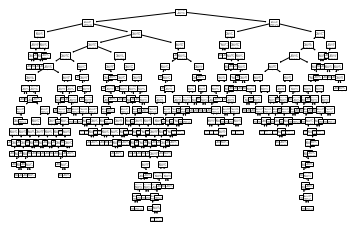

In [7]:
# Transfer categorical features to non-categorical features 
# (since scikit-learn decision tree does not support categorical data)
for i in range(1, len(titanic)):
    if titanic[i][3] == 'male':
        titanic[i][3] = 0 # male -> 0
    else:
        titanic[i][3] = 1 # female -> 1
    if titanic[i][8] == 'S': 
        titanic[i][8] = 0 # 'S' -> 0
    elif titanic[i][8] == 'Q':
        titanic[i][8] = 1 # 'Q' -> 1
    else:
        titanic[i][8] = 2 # 'C' -> 3

# Divide into x and y
x = [] # The features we want to use
y = [titanic[i][1] for i in range(1, len(titanic))] # Survival, the class value we want to classify with
for i in range(1, len(titanic)):
    temp = titanic[i]
    temp.pop(0) # remove first column (the passenger ID)
    temp.pop(0) # remove second column (survival - y value)
    x.append(temp)
    
# Build decision tree using default settings and show the tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
tree.plot_tree(clf)

[Text(167.4, 190.26, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(83.7, 135.9, 'X[2] <= 13.0\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 2.5\ngini = 0.493\nsamples = 41\nvalue = [18, 23]'),
 Text(20.925, 27.180000000000007, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 26.269\ngini = 0.269\nsamples = 536\nvalue = [450, 86]'),
 Text(104.625, 27.180000000000007, 'gini = 0.177\nsamples = 397\nvalue = [358, 39]'),
 Text(146.475, 27.180000000000007, 'gini = 0.448\nsamples = 139\nvalue = [92, 47]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1

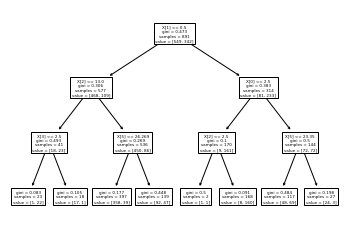

In [9]:
# Experiment with different decision tree parameters

# Use max_depth to limit the growth of complex tree structure:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x, y)
tree.plot_tree(clf)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(66.96000000000001, 108.72, 'gini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]')]

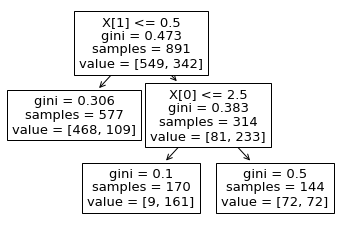

In [12]:
# Use min_impurity_decrease to limit the growth of complex tree structure:
clf = tree.DecisionTreeClassifier(min_impurity_decrease = 0.02)
clf = clf.fit(x, y)
tree.plot_tree(clf)

[Text(197.83636363636364, 190.26, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(121.74545454545455, 135.9, 'X[2] <= 13.0\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(60.872727272727275, 81.53999999999999, 'X[3] <= 2.5\nentropy = 0.989\nsamples = 41\nvalue = [18, 23]'),
 Text(30.436363636363637, 27.180000000000007, 'entropy = 0.258\nsamples = 23\nvalue = [1, 22]'),
 Text(91.30909090909091, 27.180000000000007, 'entropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(182.61818181818182, 81.53999999999999, 'X[5] <= 26.269\nentropy = 0.635\nsamples = 536\nvalue = [450, 86]'),
 Text(152.1818181818182, 27.180000000000007, 'entropy = 0.463\nsamples = 397\nvalue = [358, 39]'),
 Text(213.05454545454546, 27.180000000000007, 'entropy = 0.923\nsamples = 139\nvalue = [92, 47]'),
 Text(273.92727272727274, 135.9, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(243.4909090909091, 81.53999999999999, 'entropy = 0.299\nsamples = 170\nvalu

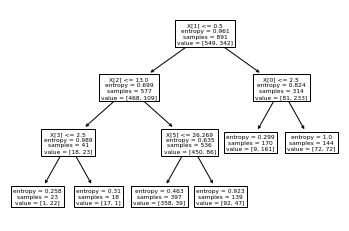

In [15]:
# Use entropy to calculate info gain rather than gini index:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease = 0.02)
clf = clf.fit(x, y)
tree.plot_tree(clf)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 1.0\nsamples = 144\nvalue = [72, 72]')]

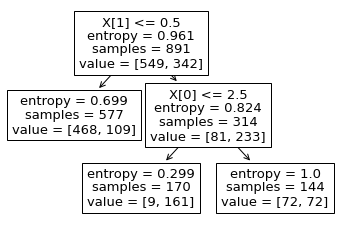

In [16]:
# Use entropy to calculate info gain rather than gini index:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease = 0.05)
clf = clf.fit(x, y)
tree.plot_tree(clf)